<a href="https://colab.research.google.com/github/bhupeshmahara/green-energy-forcast/blob/main/Green-Energy-Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/green-energy-forcast/main/train.csv")
print(train.shape)
test = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/green-energy-forcast/main/test.csv")
print(test.shape)

(94992, 3)
(26304, 2)


In [3]:
train.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [4]:
test.isnull().sum()

row_id      0
datetime    0
dtype: int64

In [5]:
train.describe()

,row_id,energy
count,94992.000000,93092.000000
mean,47496.500000,1702.995014
std,27421.972723,369.322103
min,1.000000,866.388600
25%,23748.750000,1431.541100
50%,47496.500000,1654.465800
75%,71244.250000,1935.993450
max,94992.000000,3374.399600


In [6]:
# imputing missing values of energy by median

train['energy'] = train['energy'].fillna(train['energy'].median())
train.isnull().sum()

row_id      0
datetime    0
energy      0
dtype: int64

In [7]:
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    94992 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [9]:
train["datetime"] = train["datetime"].apply(pd.to_datetime)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    94992 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [11]:
train['date'] = pd.to_datetime(train['datetime']).dt.date
train['time'] = pd.to_datetime(train['datetime']).dt.time
train.head()

,row_id,datetime,energy,date,time
0,1,2008-03-01 00:00:00,1259.985563,2008-03-01,00:00:00
1,2,2008-03-01 01:00:00,1095.541500,2008-03-01,01:00:00
2,3,2008-03-01 02:00:00,1056.247500,2008-03-01,02:00:00
3,4,2008-03-01 03:00:00,1034.742000,2008-03-01,03:00:00
4,5,2008-03-01 04:00:00,1026.334500,2008-03-01,04:00:00


In [12]:
train['year'] = pd.DatetimeIndex(train['date']).year
train['monthofyear'] = pd.DatetimeIndex(train['date']).month
train['dayofmonth'] = pd.DatetimeIndex(train['date']).day

train['time'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.time
train['hours'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.hour
train['minutes'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.minute
train['seconds'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.second

train.head()

,row_id,datetime,energy,date,time,year,monthofyear,dayofmonth,hours,minutes,seconds
0,1,2008-03-01 00:00:00,1259.985563,2008-03-01,00:00:00,2008,3,1,0,0,0
1,2,2008-03-01 01:00:00,1095.541500,2008-03-01,01:00:00,2008,3,1,1,0,0
2,3,2008-03-01 02:00:00,1056.247500,2008-03-01,02:00:00,2008,3,1,2,0,0
3,4,2008-03-01 03:00:00,1034.742000,2008-03-01,03:00:00,2008,3,1,3,0,0
4,5,2008-03-01 04:00:00,1026.334500,2008-03-01,04:00:00,2008,3,1,4,0,0


In [13]:
# droping "datetime", "date", "time"

train.drop(['datetime', 'date', 'time'], axis=1, inplace = True)
train.head()

,row_id,energy,year,monthofyear,dayofmonth,hours,minutes,seconds
0,1,1259.985563,2008,3,1,0,0,0
1,2,1095.541500,2008,3,1,1,0,0
2,3,1056.247500,2008,3,1,2,0,0
3,4,1034.742000,2008,3,1,3,0,0
4,5,1026.334500,2008,3,1,4,0,0


In [14]:
train.describe()

,row_id,energy,year,monthofyear,dayofmonth,hours,minutes,seconds
count,94992.000000,94992.000000,94992.000000,94992.000000,94992.000000,94992.000000,94992.0,94992.0
mean,47496.500000,1702.024348,2013.075038,6.599040,15.733704,11.500000,0.0,0.0
std,27421.972723,365.673003,3.125436,3.417591,8.802197,6.922223,0.0,0.0
min,1.000000,866.388600,2008.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,23748.750000,1436.432500,2010.000000,4.000000,8.000000,5.750000,0.0,0.0
50%,47496.500000,1654.465800,2013.000000,7.000000,16.000000,11.500000,0.0,0.0
75%,71244.250000,1930.196675,2016.000000,10.000000,23.000000,17.250000,0.0,0.0
max,94992.000000,3374.399600,2018.000000,12.000000,31.000000,23.000000,0.0,0.0


In [15]:
# creating function to identify time of day: early morning, morning, afternoon, evening, night and late night

def time_of_day(n):
    if n in range(4,8):
        return 'EarlyMorning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,21):
        return 'Evening'
    elif n in range(21,24) or n==0:
        return 'Night'
    elif n in range(0,4):
        return 'LateNight'

train['time_of_day'] = train['hours'].apply(lambda x: time_of_day(x))
train.head()

,row_id,energy,year,monthofyear,dayofmonth,hours,minutes,seconds,time_of_day
0,1,1259.985563,2008,3,1,0,0,0,Night
1,2,1095.541500,2008,3,1,1,0,0,LateNight
2,3,1056.247500,2008,3,1,2,0,0,LateNight
3,4,1034.742000,2008,3,1,3,0,0,LateNight
4,5,1026.334500,2008,3,1,4,0,0,EarlyMorning


In [16]:
# encoding "time_of_day" numerically

train['time_of_day'].replace({'EarlyMorning' : 0, 'Morning' : 1, 'Afternoon' : 2, 'Evening' : 3, 'Night' : 4, 'LateNight' : 5}, inplace=True)
train.head()

,row_id,energy,year,monthofyear,dayofmonth,hours,minutes,seconds,time_of_day
0,1,1259.985563,2008,3,1,0,0,0,4
1,2,1095.541500,2008,3,1,1,0,0,5
2,3,1056.247500,2008,3,1,2,0,0,5
3,4,1034.742000,2008,3,1,3,0,0,5
4,5,1026.334500,2008,3,1,4,0,0,0


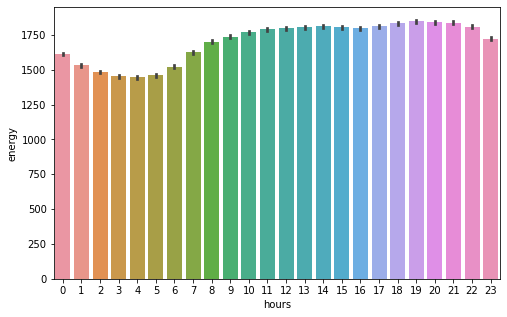

In [21]:
# hourly energy demand

plt.figure(figsize = (8,5))
sns.barplot(x = train['hours'], y = train['energy'])
plt.show()

In [26]:
# train test split

X = train.drop(['energy'], axis=1)
y = train['energy']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0),
    AdaBoostRegressor(n_estimators=100, random_state=0),
    GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0),
    SVR(kernel='rbf', gamma=0.1),
    KNeighborsRegressor(n_neighbors=7)
]
rmse = []
model_dict = {}
for model in models:
    model_dict[model.__class__.__name__] = model
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
    rmse.append(np.sqrt(-cv_results['test_score']).mean())

In [ ]:
rmse